<a href="https://www.pieriandata.com"><img src="../DATA/Logo.jpg"></a>
*Copyright by Pierian Data Inc.*

# Image Thresholding

src	input array (multiple-channel, 8-bit or 32-bit floating point).
dst	output array of the same size and type and the same number of channels as src.
thresh	threshold value.
maxval	maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.
type	thresholding type (see ThresholdTypes).

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('../DATA/rainbow.jpg')

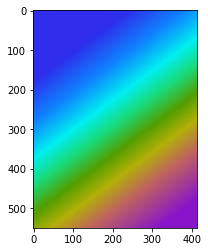

In [3]:
plt.imshow(img)

In [4]:
# Adding the 0 flag to read it in black and white
img = cv2.imread('../DATA/rainbow.jpg',0)

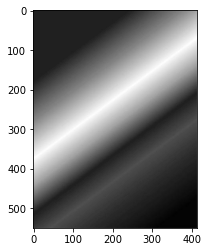

In [5]:
plt.imshow(img,cmap='gray')

## Different Threshold Types

### Binary

In [6]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

In [7]:
ret

127.0

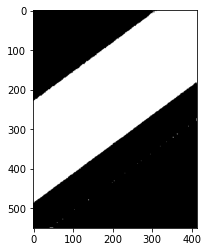

In [9]:
plt.imshow(thresh1,cmap='gray')

### Binary Inverse

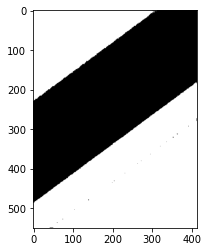

In [11]:
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh2,cmap='gray')

###  Threshold Truncation

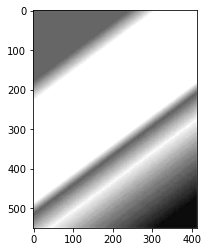

In [13]:
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
plt.imshow(thresh3,cmap='gray')

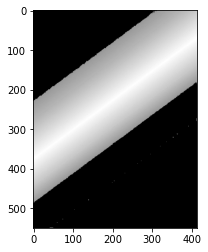

In [15]:
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
plt.imshow(thresh4,cmap='gray')

### Threshold to Zero (Inverse)

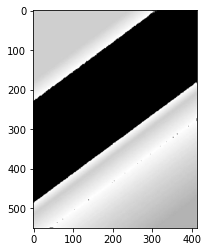

In [16]:
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
plt.imshow(thresh5,cmap='gray')

# Real World Applications

## Adaptive Thresholding



### Sudoku Image

In [17]:
img = cv2.imread("../DATA/crossword.jpg",0)

In [18]:
def show_pic(img):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

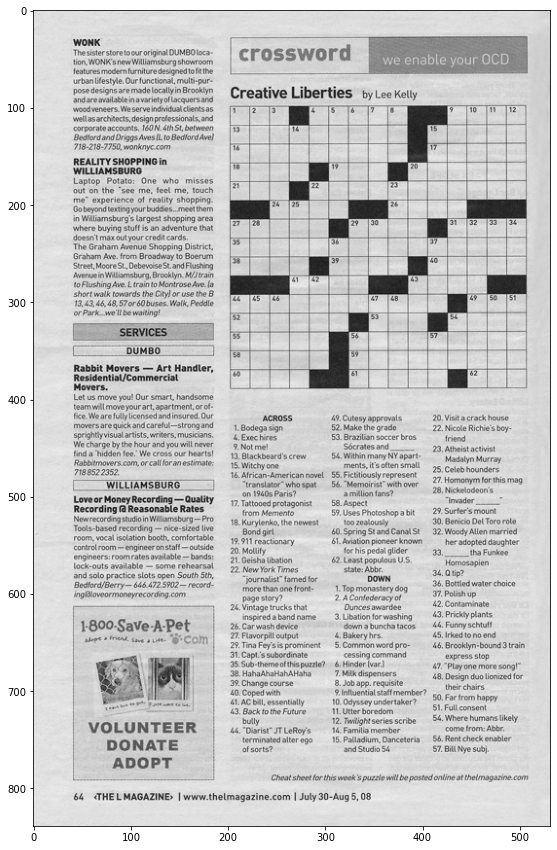

In [20]:
show_pic(img)

## Simple Binary

In [21]:
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

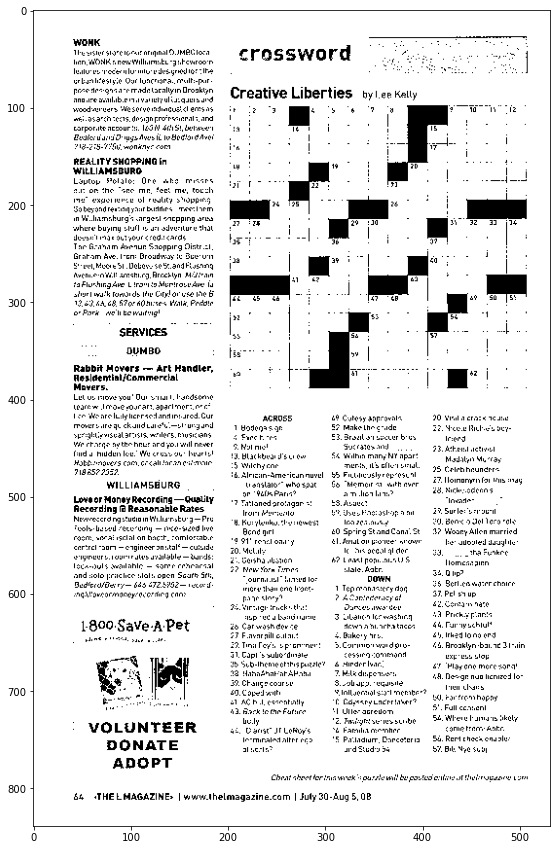

In [23]:
show_pic(th1)

### Adaptive Threshold

https://stackoverflow.com/questions/28763419/adaptive-threshold-parameters-confusion

    @param src Source 8-bit single-channel image.
    .   @param dst Destination image of the same size and the same type as src.
    .   @param maxValue Non-zero value assigned to the pixels for which the condition is satisfied
    .   @param adaptiveMethod Adaptive thresholding algorithm to use, see #AdaptiveThresholdTypes.
    .   The #BORDER_REPLICATE | #BORDER_ISOLATED is used to process boundaries.
    .   @param thresholdType Thresholding type that must be either #THRESH_BINARY or #THRESH_BINARY_INV,
    .   see #ThresholdTypes.
    .   @param blockSize Size of a pixel neighborhood that is used to calculate a threshold value for the
    .   pixel: 3, 5, 7, and so on.
    .   @param C Constant subtracted from the mean or weighted mean (see the details below). Normally, it
    .   is positive but may be zero or negative as well.

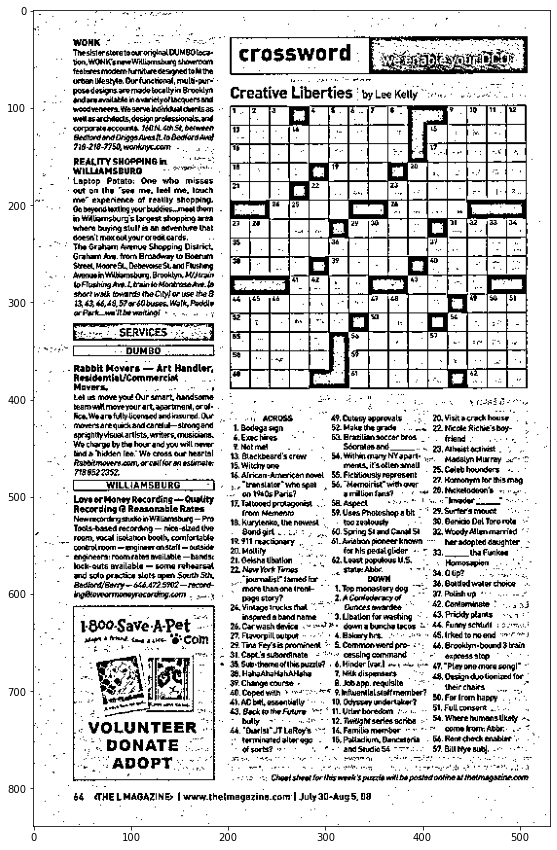

In [25]:
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,8) # Play around with these last 2 numbers
show_pic(th2)

In [26]:
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,8)

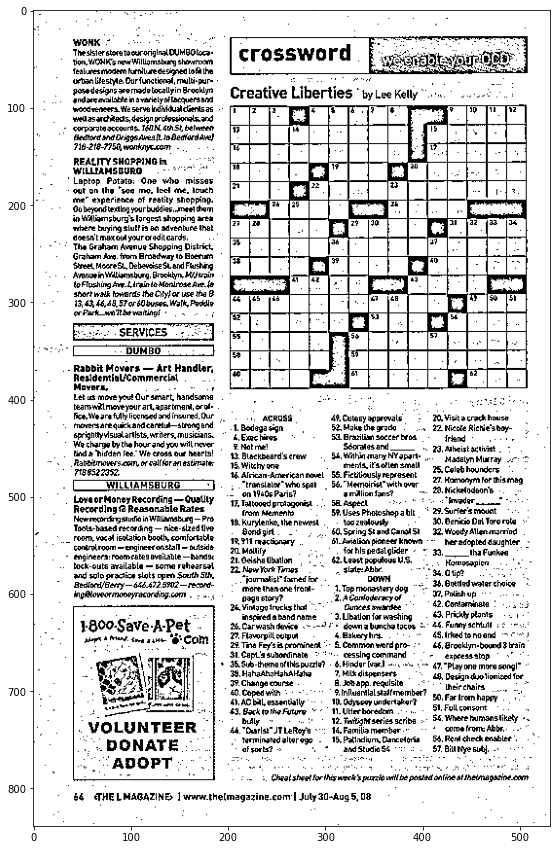

In [27]:
show_pic(th3)

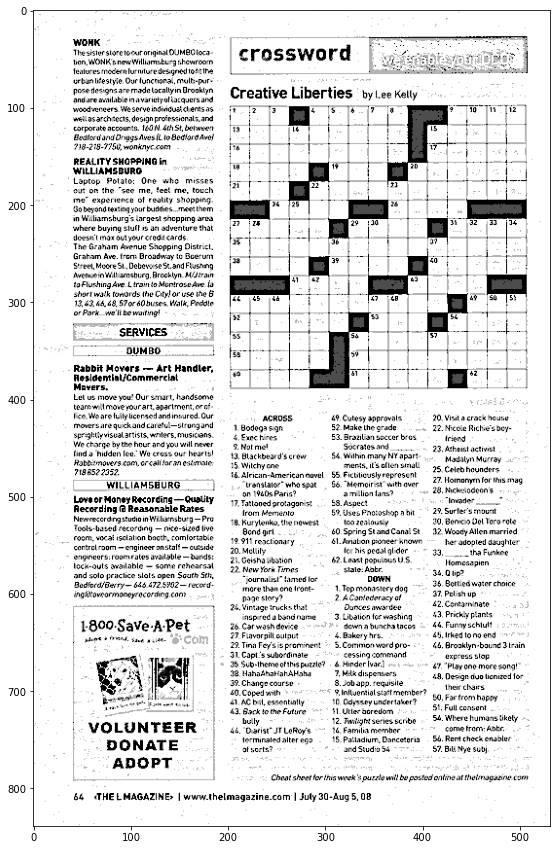

In [29]:
blended = cv2.addWeighted(src1=th1,alpha=0.7,src2=th2,beta=0.3,gamma=0)
show_pic(blended)

## Great Work!